 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [374]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [375]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_path, index_col='Date', parse_dates=True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [376]:
# Count nulls
whale_data.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [377]:
# Drop nulls
whale_data = whale_data.dropna()
whale_data.isna().sum()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [378]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_path, index_col='Date', parse_dates=True)
algo_data.sort_index(ascending= True, inplace= True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [379]:
# Count nulls
algo_data.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [380]:
# Drop nulls
algo_data = algo_data.dropna()
algo_data.isna().sum()
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [381]:
# Reading S&P 500 Closing Prices
sap_path = Path("Resources/sp500_history.csv")
sap_data = pd.read_csv(sap_path, index_col='Date', parse_dates=True)
sap_data.sort_index(ascending= True, inplace= True)
sap_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [382]:
# Check Data Types
sap_data.dtypes

Close    object
dtype: object

In [383]:
# Fix Data Types
sap_data['Close'] = sap_data['Close'].str.replace('$','').astype('float')


c:\Users\Elias\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [384]:
# Calculate Daily Returns
sp_daily_returns = sap_data.pct_change()
sp_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [385]:
# Drop nulls
sp_daily_returns.dropna(inplace= True)
sp_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [386]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns.rename(columns= {'Close':'SP500 Daily Return'}, inplace= True)
sp_daily_returns.head()

,SP500 Daily Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [387]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_combined = pd.concat([whale_data, algo_data, sp_daily_returns], axis = 'columns', join= 'inner')
df_combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

---

<AxesSubplot:xlabel='Date'>

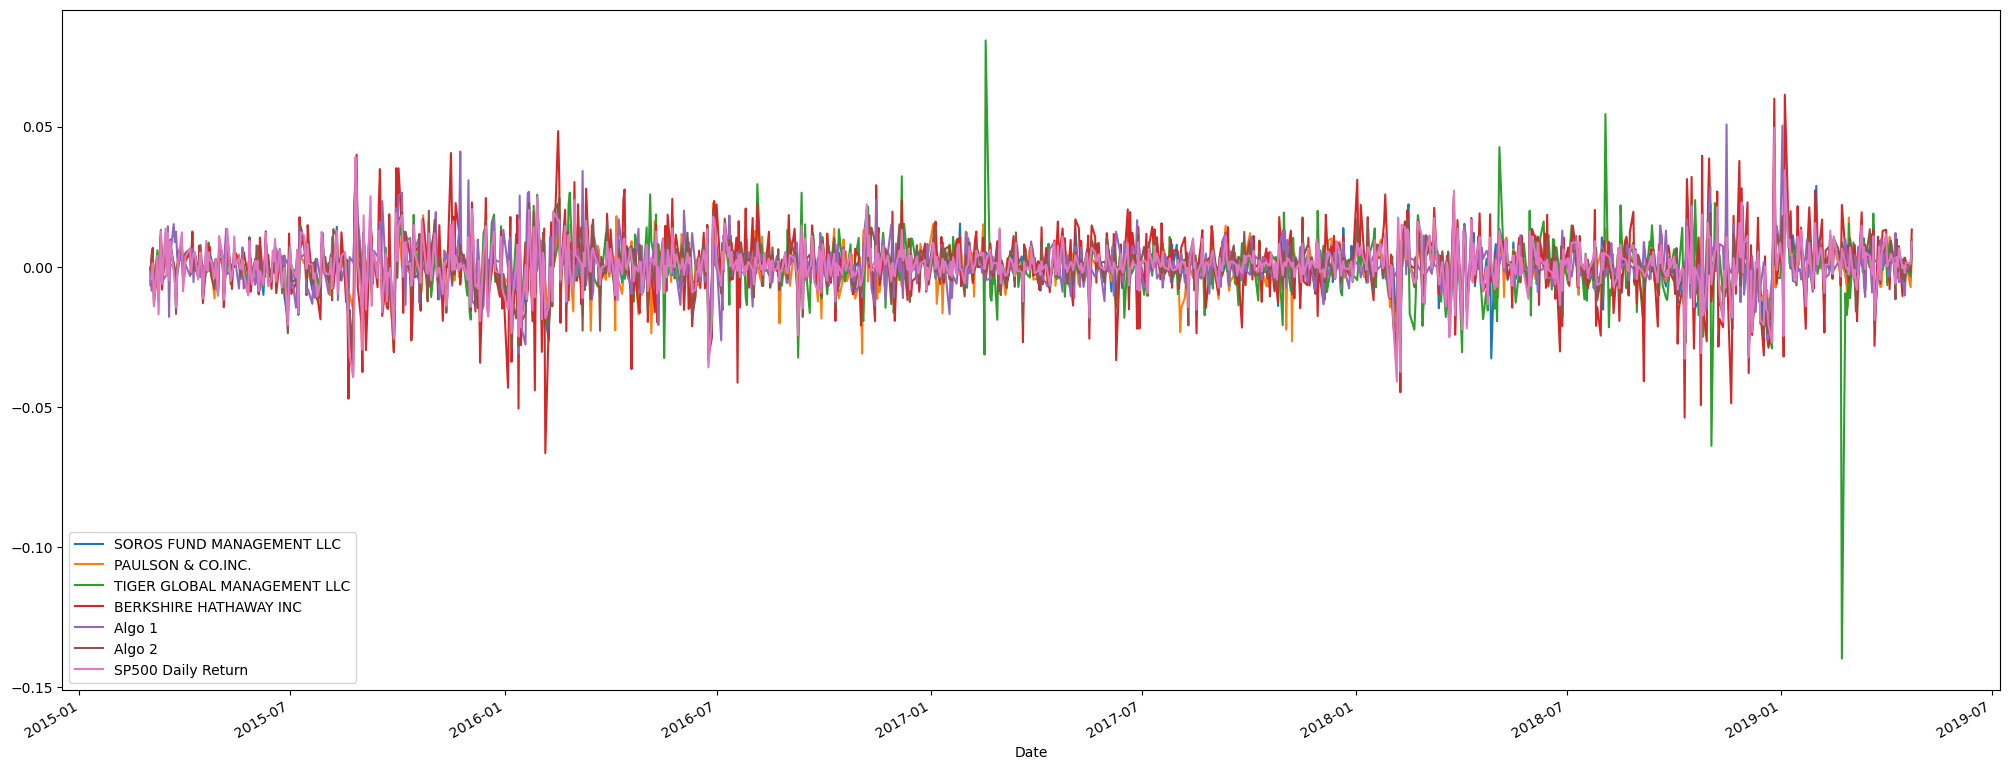

In [388]:
# Plot daily returns of all portfolios
df_combined.plot(figsize=(25, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

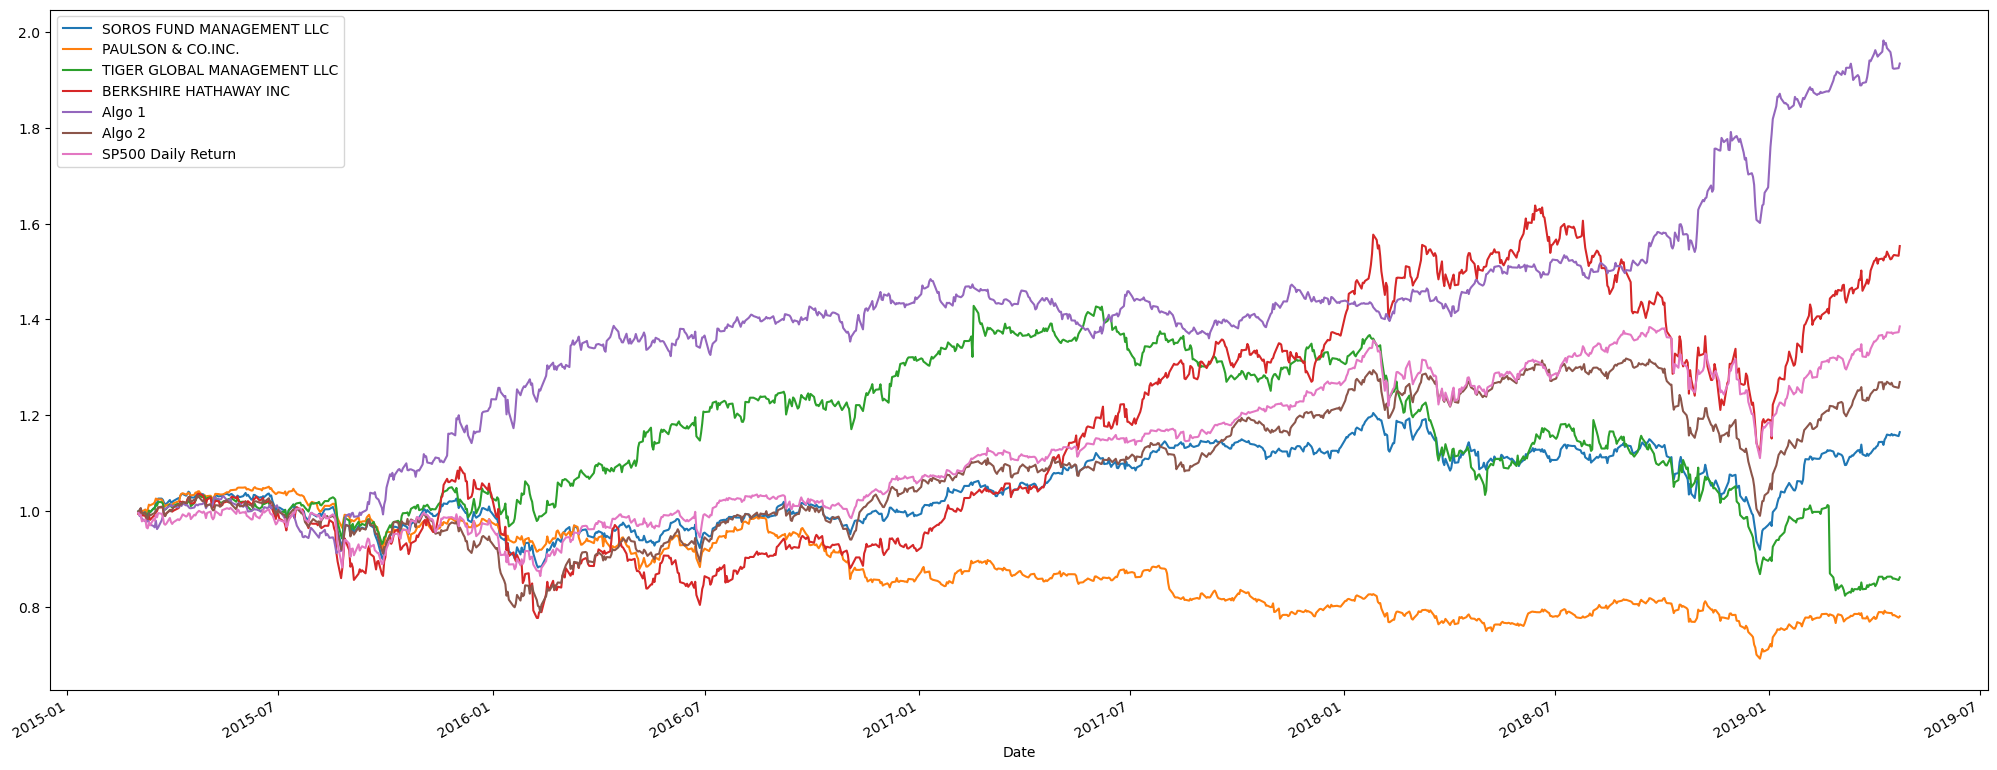

In [389]:
# Calculate cumulative returns of all portfolios
df_cumulative = (1+ df_combined).cumprod()

# Plot cumulative returns
df_cumulative.plot(figsize=(25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

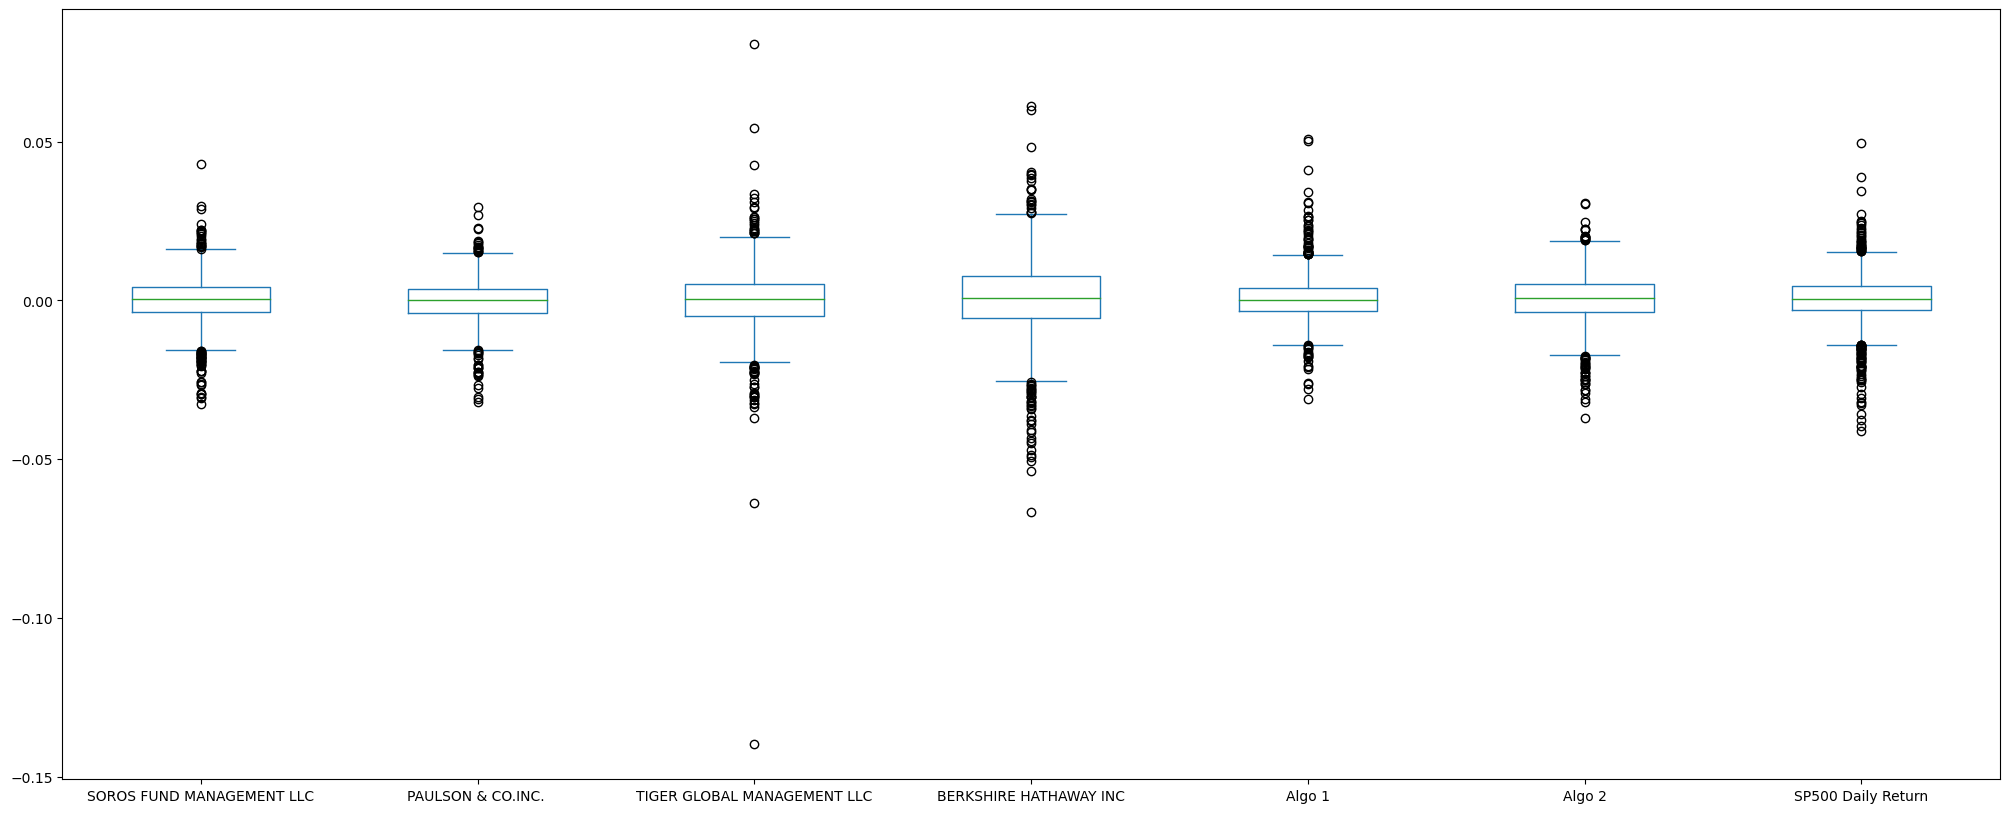

In [390]:
# Box plot to visually show risk
df_combined.plot(kind = 'box', figsize=(25,10))

### Calculate Standard Deviations

In [391]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = pd.DataFrame(df_combined.std())
df_daily_std = df_daily_std.rename(columns= {0 : 'Standard Deviation'})
df_daily_std

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
SP500 Daily Return,0.008554


### Determine which portfolios are riskier than the S&P 500

In [392]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
riskier = df_daily_std[df_daily_std['Standard Deviation'] > df_daily_std.loc['SP500 Daily Return', 'Standard Deviation']]
riskier

,Standard Deviation
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [393]:
# Calculate the annualized standard deviation (252 trading days)
annualize_std = df_daily_std*np.sqrt(252)
annualize_std

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
SP500 Daily Return,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

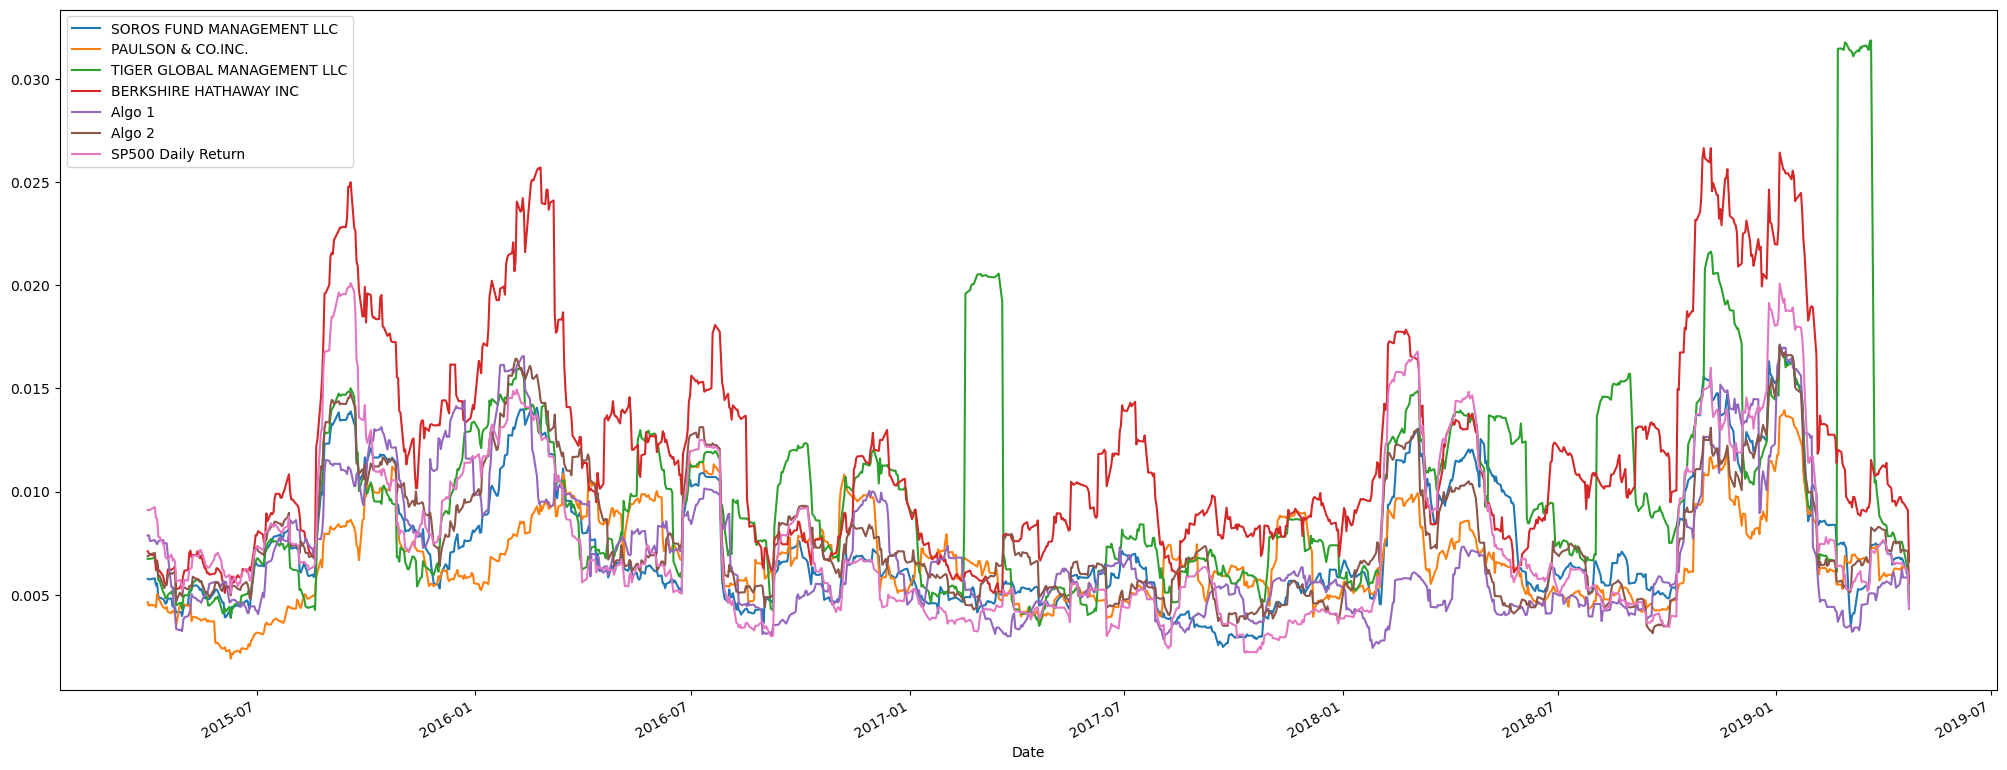

In [394]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_rolling_21 = df_combined.rolling(window = 21).std()

# Plot the rolling standard deviation
df_rolling_21.plot(figsize=(25,10))

### Calculate and plot the correlation

<AxesSubplot:>

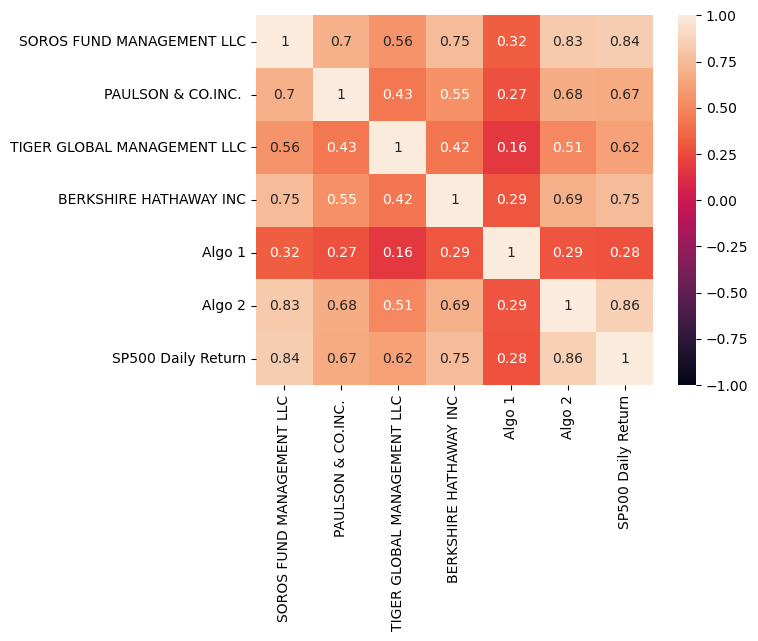

In [395]:
# Calculate the correlation
correlation = df_combined.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

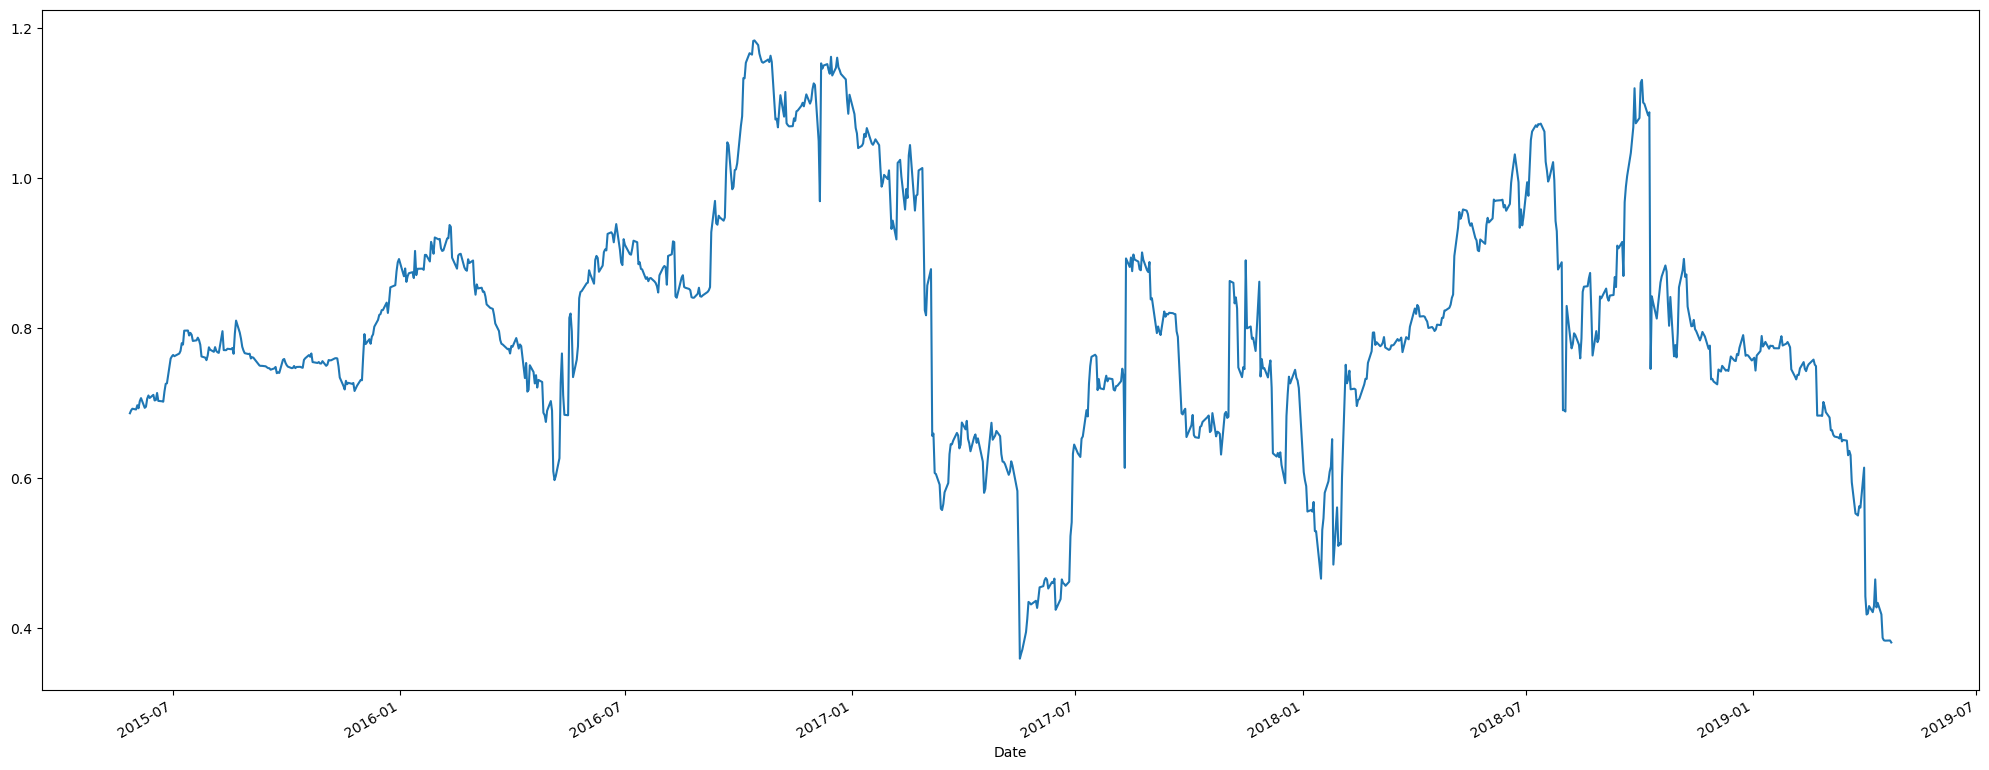

In [396]:
# Calculate covariance of a single portfolio
tiger_covariance = df_combined['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(df_combined['SP500 Daily Return'])

# Calculate variance of S&P 500
sp_variance = df_combined['SP500 Daily Return'].rolling(window=60).var()

# Computing beta
tiger_beta = tiger_covariance / sp_variance

# Plot beta trend
tiger_beta.plot(figsize=(25,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

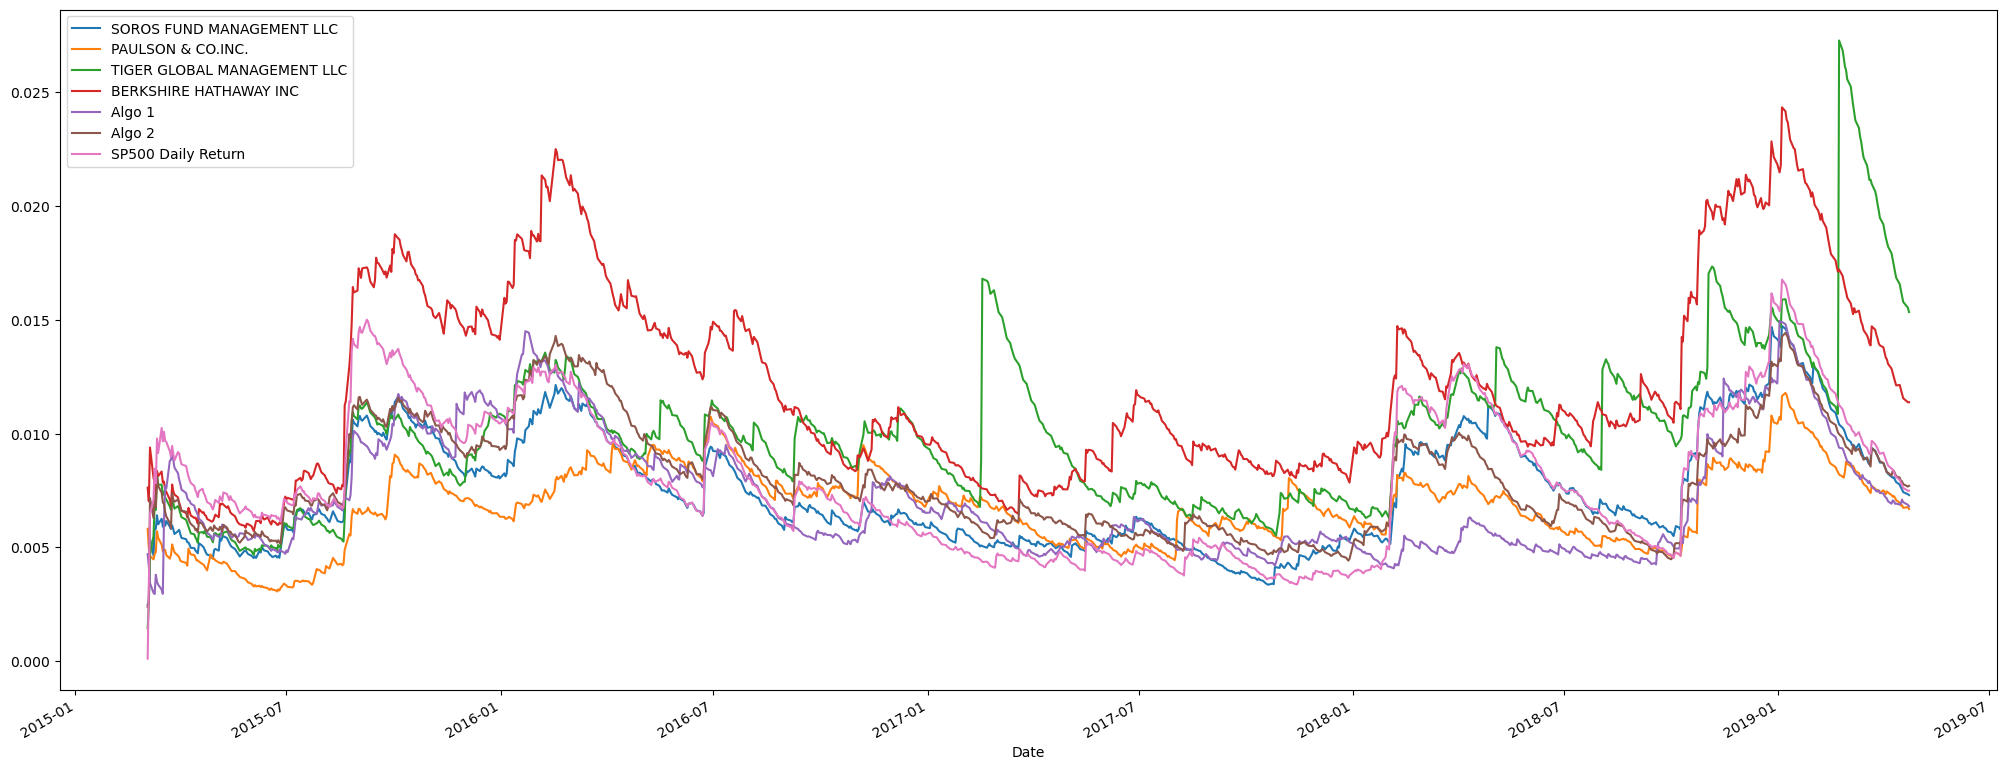

In [397]:
# Use `ewm` to calculate the rolling window
rolling_window_emw = df_combined.ewm(halflife=21, adjust=True).std()
rolling_window_emw.plot(figsize=(25,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [398]:
# Annualized Sharpe Ratios
sharpe_ratios = (df_combined.mean() * 252) / (df_combined.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Daily Return             0.648267
dtype: float64

<AxesSubplot:>

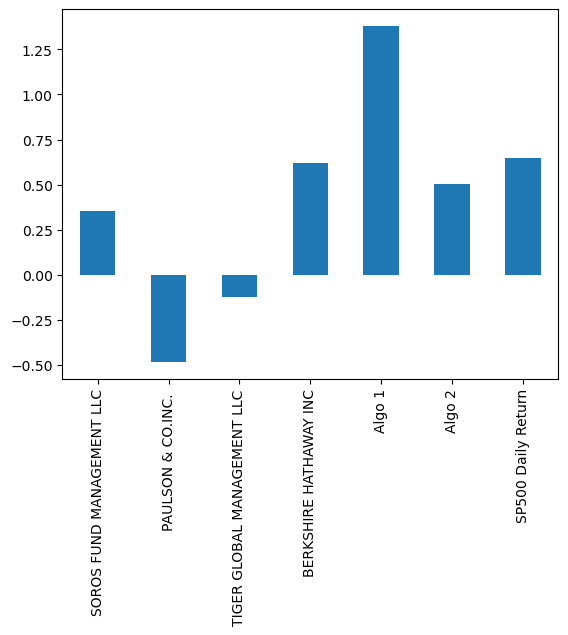

In [399]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind= 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 certainly exceeds market expectations, whereas algo 2 falls more in line with the S&P500, overall the whales either underperformed or failed to keep up with the S&P aside from Berkshire Hathaway.  In terms of opportunity, Tiger Global had some exciting times throughout its trading days, but on terms of long-term investing and minimizing risk, Algo 1 would certainly be the winner.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [400]:
# Reading data from 1st stock
aapl_path = ('Resources/Custom/applestock.csv')
aapl_data = pd.read_csv(aapl_path, index_col='Date', parse_dates=True).rename(columns={'Close':'Apple Close'})
aapl_data.head()

,Apple Close
Date,
2015-03-03,32.34
2015-03-04,32.14
2015-03-05,31.60
2015-03-06,31.65
2015-03-09,31.79


In [401]:
# Reading data from 2nd stock
msft_path = ('Resources/Custom/microsoftstock.csv')
msft_data = pd.read_csv(msft_path, index_col='Date', parse_dates=True).rename(columns={'Close':'Microsoft Close'})
msft_data.head()

,Microsoft Close
Date,
2015-03-03,43.28
2015-03-04,43.06
2015-03-05,43.11
2015-03-06,42.36
2015-03-09,42.85


In [402]:
# Reading data from 3rd stock
amzn_path = ('Resources/Custom/amazonstock.csv')
amzn_data = pd.read_csv(amzn_path, index_col='Date', parse_dates=True).rename(columns={'Close':'Amazon Close'})
amzn_data.head()

,Amazon Close
Date,
2015-03-03,19.23
2015-03-04,19.14
2015-03-05,19.39
2015-03-06,19.00
2015-03-09,18.93


In [403]:
# Combine all stocks in a single DataFrame
portfolio_combined = pd.concat([aapl_data, msft_data, amzn_data], axis= 'columns', join='inner')
portfolio_combined

,Apple Close,Microsoft Close,Amazon Close
Date,,,
2015-03-03,32.34,43.28,19.23
2015-03-04,32.14,43.06,19.14
2015-03-05,31.60,43.11,19.39
2015-03-06,31.65,42.36,19.00
2015-03-09,31.79,42.85,18.93
...,...,...,...
2017-02-22,34.28,64.36,42.78
2017-02-23,34.13,64.62,42.61
2017-02-24,34.17,64.62,42.26


In [404]:
# Reset Date index
# Already done earlier - Eli


In [405]:
# Reorganize portfolio data by having a column per symbol
# Already done earlier - Eli

In [406]:
# Calculate daily returns
portfolio_daily_returns = portfolio_combined.pct_change()

# Drop NAs
portfolio_daily_returns.dropna(inplace=True)

# Display sample data
portfolio_daily_returns

,Apple Close,Microsoft Close,Amazon Close
Date,,,
2015-03-04,-0.006184,-0.005083,-0.004680
2015-03-05,-0.016801,0.001161,0.013062
2015-03-06,0.001582,-0.017397,-0.020113
2015-03-09,0.004423,0.011568,-0.003684
2015-03-10,-0.020761,-0.019137,-0.023772
...,...,...,...
2017-02-22,0.003219,-0.002016,-0.000934
2017-02-23,-0.004376,0.004040,-0.003974
2017-02-24,0.001172,0.000000,-0.008214


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [407]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = portfolio_daily_returns.dot(weights)

# Display sample data
portfolio_returns

Date
2015-03-04   -0.005316
2015-03-05   -0.000860
2015-03-06   -0.011976
2015-03-09    0.004102
2015-03-10   -0.021223
                ...   
2017-02-22    0.000090
2017-02-23   -0.001437
2017-02-24   -0.002347
2017-02-27   -0.000086
2017-02-28   -0.002517
Length: 502, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [408]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio = pd.concat((portfolio_returns, df_combined), axis='columns', join='inner')
combined_portfolio.rename(columns={0:'My Portfolio Returns'}, inplace=True)
combined_portfolio

,My Portfolio Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Return
Date,,,,,,,,
2015-03-04,-0.005316,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,-0.000860,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.011976,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.004102,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.021223,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
...,...,...,...,...,...,...,...,...
2017-02-22,0.000090,-0.005889,-0.004094,-0.012095,0.003114,-0.000979,-0.002566,-0.001082
2017-02-23,-0.001437,-0.006354,0.002178,-0.004155,-0.003353,0.003574,-0.001411,0.000419
2017-02-24,-0.002347,0.001097,-0.003004,0.001260,-0.002846,-0.001867,-0.001231,0.001493


In [409]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio.isna().sum()

My Portfolio Returns           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500 Daily Return             0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [410]:
# Calculate the annualized `std`
portfolio_std = pd.DataFrame(combined_portfolio.std())
portfolio_std = portfolio_std.rename(columns= {0:'Standard Deviation'})
portfolio_std

,Standard Deviation
My Portfolio Returns,0.013338
SOROS FUND MANAGEMENT LLC,0.007766
PAULSON & CO.INC.,0.007270
TIGER GLOBAL MANAGEMENT LLC,0.010049
BERKSHIRE HATHAWAY INC,0.013047
Algo 1,0.008440
Algo 2,0.008987
SP500 Daily Return,0.008761


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

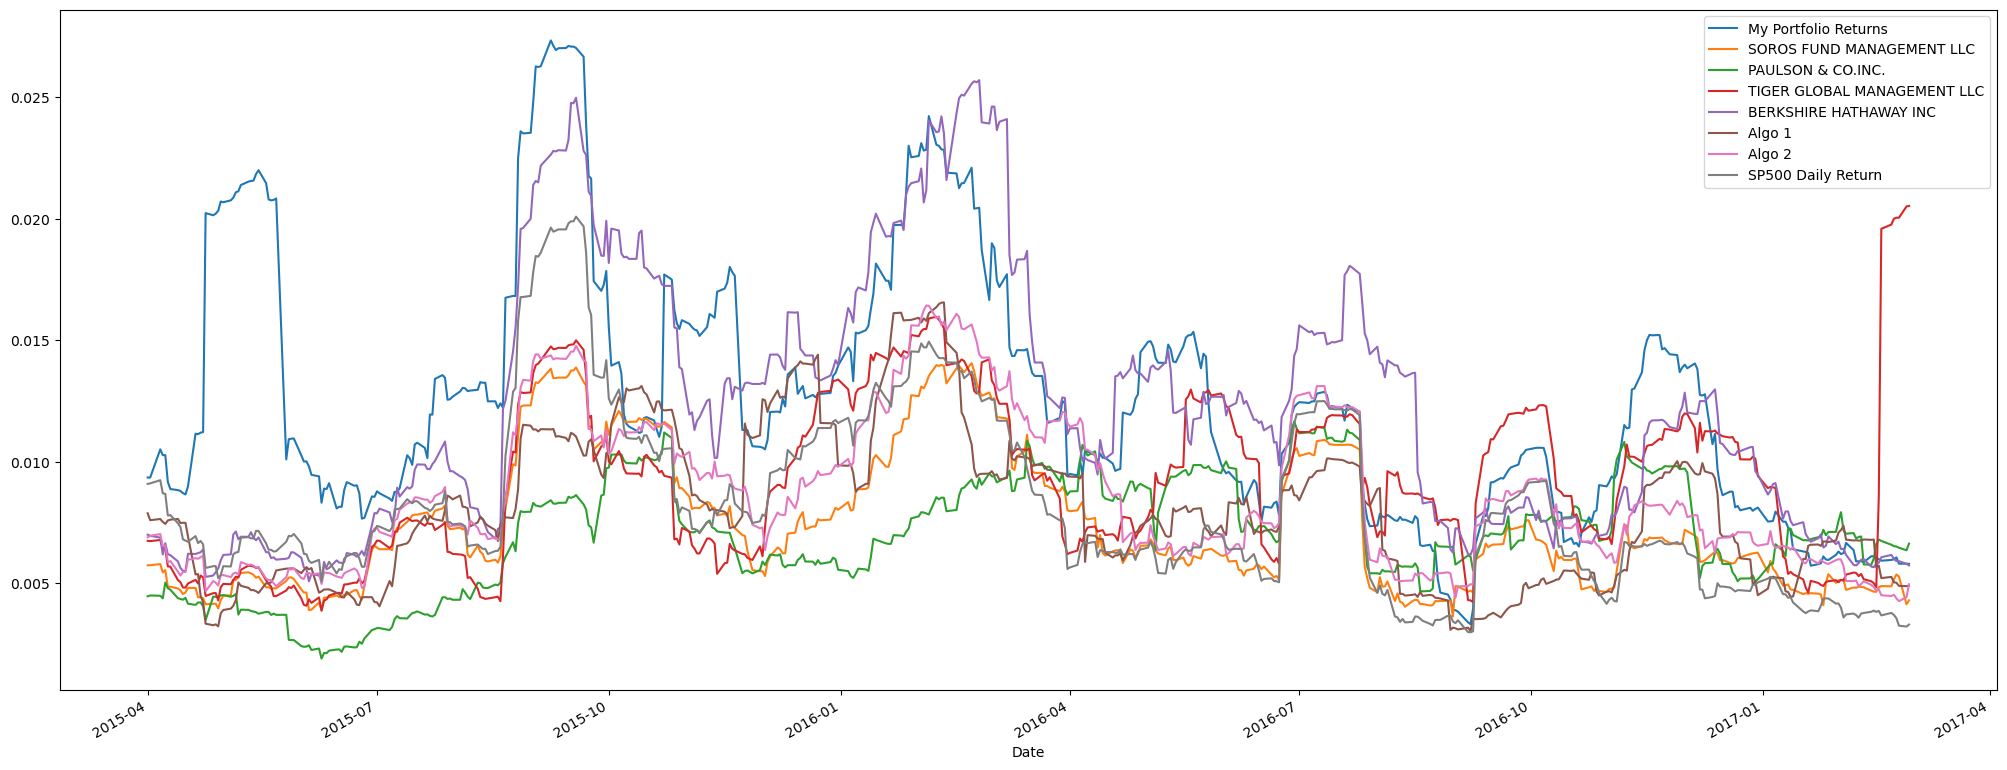

In [411]:
# Calculate rolling standard deviation
portfolio_rolling_21 = combined_portfolio.rolling(window= 21).std()

# Plot rolling standard deviation
portfolio_rolling_21.plot(figsize=(25,10))

### Calculate and plot the correlation

<AxesSubplot:>

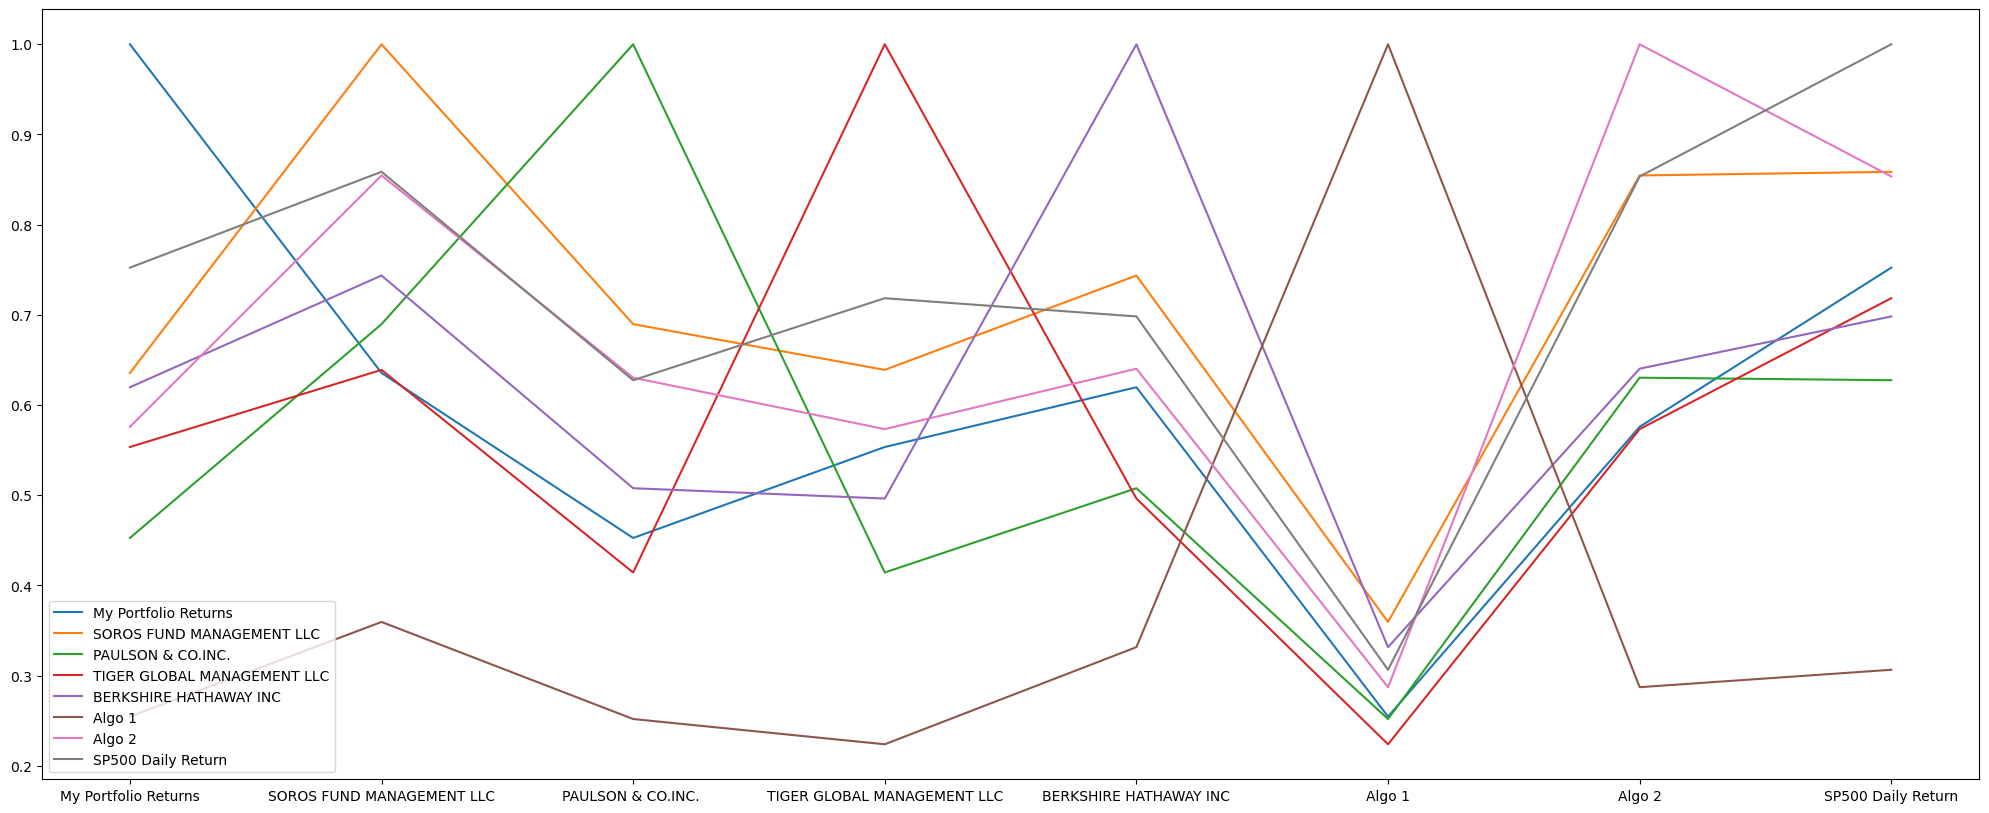

In [412]:
# Calculate and plot the correlation
portfolio_correlation = combined_portfolio.corr()
portfolio_correlation.plot(figsize=(25,10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

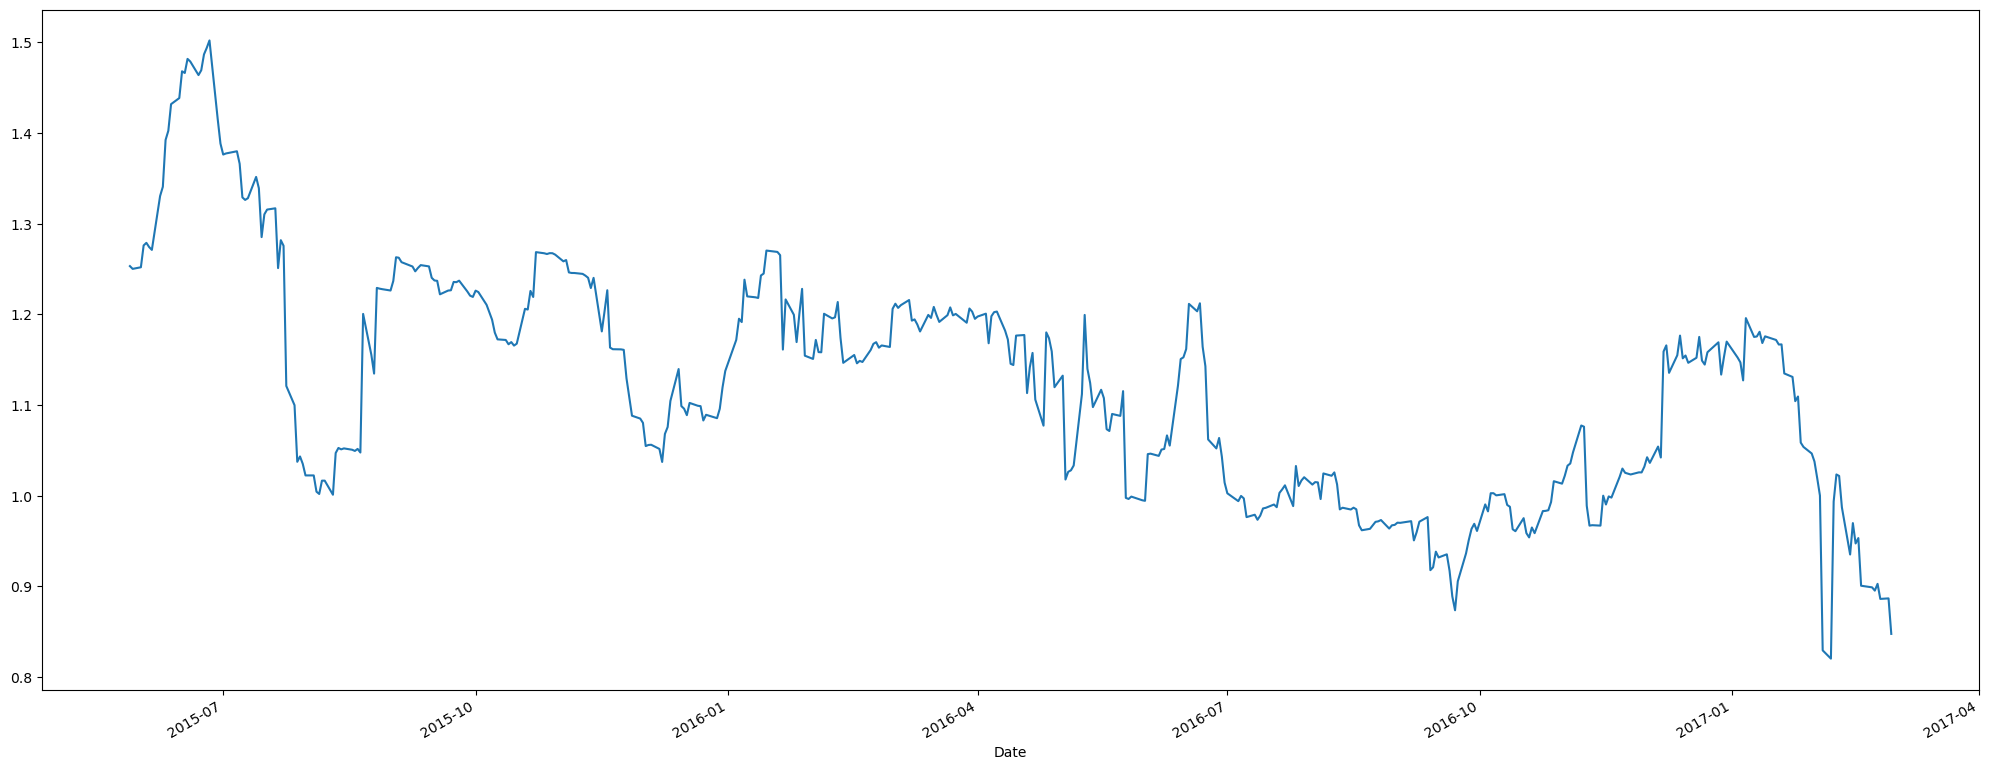

In [419]:
# Calculate and plot Beta
portfolio_covariance = combined_portfolio['My Portfolio Returns'].rolling(window=60).cov(combined_portfolio['SP500 Daily Return'])
portfolio_rolling_variance = combined_portfolio['SP500 Daily Return'].rolling(window=60).var()
portfolio_rolling_beta = portfolio_covariance / portfolio_rolling_variance
portfolio_rolling_beta.plot(figsize=(25,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [414]:
# Calculate Annualized Sharpe Ratios
portfolio_sharpe_ratios = (combined_portfolio.mean() * 252) / (combined_portfolio.std() * np.sqrt(252))
portfolio_sharpe_ratios

My Portfolio Returns           1.137491
SOROS FUND MANAGEMENT LLC      0.244949
PAULSON & CO.INC.             -0.432766
TIGER GLOBAL MANAGEMENT LLC    1.079752
BERKSHIRE HATHAWAY INC         0.218102
Algo 1                         1.492087
Algo 2                         0.396725
SP500 Daily Return             0.483092
dtype: float64

<AxesSubplot:>

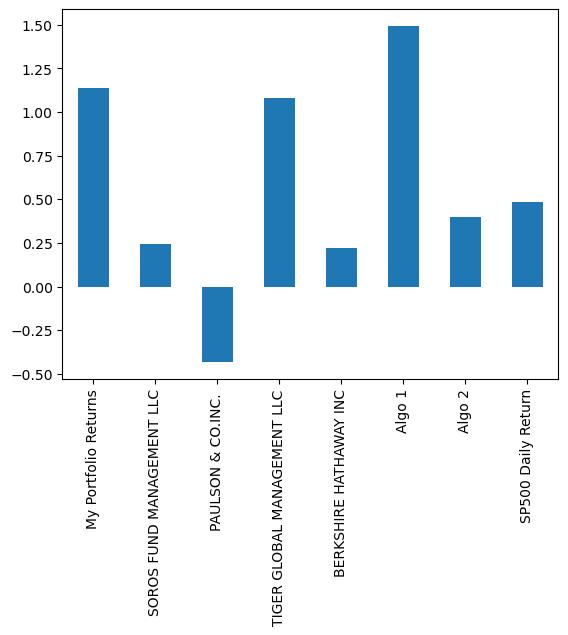

In [415]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_ratios.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

<p>My portfolio, focused on 3 of the largest tech stocks, would have performed very well during the period of time for this stock activity.  Of course there's a lot to be said about diversification for risk, these 3 stocks have been relatively consistent even into today's metrics.